In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['AABA_2006-01-01_to_2018-01-01.csv', 'GE_2006-01-01_to_2018-01-01.csv', 'MSFT_2006-01-01_to_2018-01-01.csv', 'CAT_2006-01-01_to_2018-01-01.csv', 'MCD_2006-01-01_to_2018-01-01.csv', 'GOOGL_2006-01-01_to_2018-01-01.csv', 'MMM_2006-01-01_to_2018-01-01.csv', 'JPM_2006-01-01_to_2018-01-01.csv', 'MRK_2006-01-01_to_2018-01-01.csv', 'AAPL_2006-01-01_to_2018-01-01.csv', 'BA_2006-01-01_to_2018-01-01.csv', 'VZ_2006-01-01_to_2018-01-01.csv', 'all_stocks_2017-01-01_to_2018-01-01.csv', 'DIS_2006-01-01_to_2018-01-01.csv', 'GS_2006-01-01_to_2018-01-01.csv', 'CSCO_2006-01-01_to_2018-01-01.csv', 'PFE_2006-01-01_to_2018-01-01.csv', 'AMZN_2006-01-01_to_2018-01-01.csv', 'KO_2006-01-01_to_2018-01-01.csv', 'PG_2006-01-01_to_2018-01-01.csv', 'UTX_2006-01-01_to_2018-01-01.csv', 'HD_2006-01-01_to_2018-01-01.csv', 'CVX_2006-01-01_to_2018-01-01.csv', 'UNH_2006-01-01_to_2018-01-01.csv', 'AXP_2006-01-01_to_2018-01-01.csv', 'WMT_2006-01-01_to_2018-01-01.csv', 'INTC_2006-01-01_to_2018-01-01.csv', 'XOM_2006-01-01_to_

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
google = pd.read_csv('../input/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


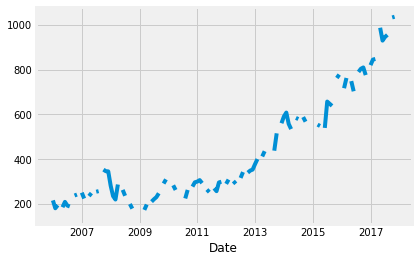

In [4]:
google["Close"].asfreq("M").plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f64ee9ccba8>,
      dtype=object)

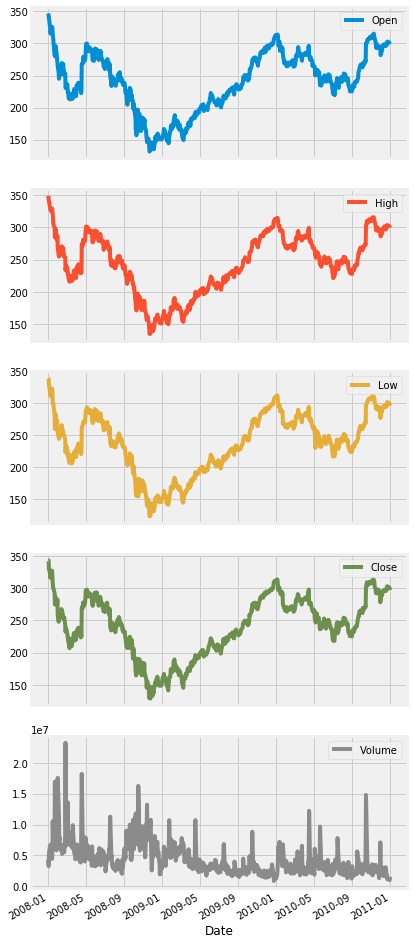

In [5]:
google["2008":"2010"].plot(subplots=True,figsize=(6,18))

In [6]:
timestamp=pd.Timestamp(2017,1,1,12)

In [7]:
periods=pd.Period("2017-01-01")
periods

Period('2017-01-01', 'D')

In [8]:
new_periods= timestamp.to_period(freq="H")
new_periods

Period('2017-01-01 12:00', 'H')

In [9]:
time=pd.date_range(start="18/11/1998",end="13/4/2019", freq="M")
time

DatetimeIndex(['1998-11-30', '1998-12-31', '1999-01-31', '1999-02-28',
               '1999-03-31', '1999-04-30', '1999-05-31', '1999-06-30',
               '1999-07-31', '1999-08-31',
               ...
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31'],
              dtype='datetime64[ns]', length=245, freq='M')

In [10]:
time=pd.date_range(start="18/11/1998",end="13/4/2019",periods=3)

In [11]:
time

DatetimeIndex(['1998-11-18 00:00:00', '2009-01-29 12:00:00',
               '2019-04-13 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [12]:
dataf=pd.DataFrame({"Year":[2015,2019],"month":[12,11],"day":[12,30]})

In [13]:
dataf

,Year,month,day
0,2015,12,12
1,2019,11,30


In [14]:
pd.to_datetime(dataf)

0   2015-12-12
1   2019-11-30
dtype: datetime64[ns]

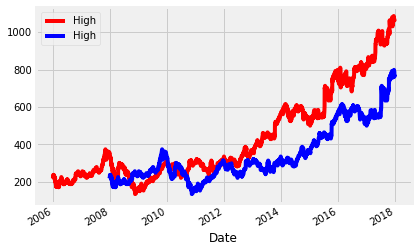

In [15]:
google["High"].plot(legend=True,color="r")
google["High"].shift(500).plot(legend=True,color="b")

In [16]:
google["High"][0:10]

Date
2006-01-03    218.05
2006-01-04    224.70
2006-01-05    226.00
2006-01-06    235.49
2006-01-09    236.94
2006-01-10    235.36
2006-01-11    237.79
2006-01-12    237.73
2006-01-13    233.68
2006-01-17    235.18
Name: High, dtype: float64

In [17]:
google["High"].shift(2)[0:10]

Date
2006-01-03       NaN
2006-01-04       NaN
2006-01-05    218.05
2006-01-06    224.70
2006-01-09    226.00
2006-01-10    235.49
2006-01-11    236.94
2006-01-12    235.36
2006-01-13    237.79
2006-01-17    237.73
Name: High, dtype: float64

In [18]:
google.resample("3D").max().

SyntaxError: invalid syntax (<ipython-input-18-e92f29c524b7>, line 1)

In [19]:
google.resample("D").pad()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-07,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-08,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
2006-01-10,232.44,235.36,231.25,235.11,9104719,GOOGL
2006-01-11,235.87,237.79,234.82,236.05,9008664,GOOGL


In [20]:
google.head(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
2006-01-10,232.44,235.36,231.25,235.11,9104719,GOOGL
2006-01-11,235.87,237.79,234.82,236.05,9008664,GOOGL
2006-01-12,237.10,237.73,230.98,232.05,10125212,GOOGL
2006-01-13,232.39,233.68,231.04,233.36,7660220,GOOGL


In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

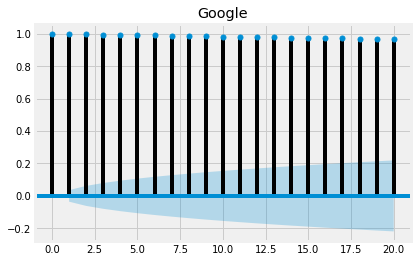

In [22]:
plot_acf(google["Close"], lags=20,title="Google")
plt.show()

In [23]:
from statsmodels.tsa.stattools import acf, pacf

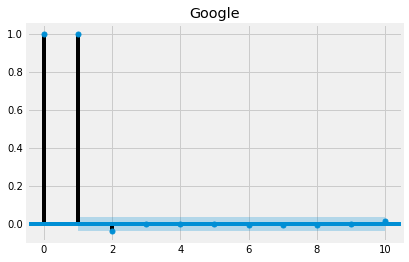

In [24]:
plot_pacf(google["High"], lags=10,title="Google")
plt.show()

In [25]:
acf1=np.log(google["High"])-np.log(google["High"]).shift()

In [26]:
acf1=acf1[1:]

In [27]:
lag_acf= acf(acf1,nlags=15)

In [28]:
lag_pacf= pacf(acf1,nlags=15)

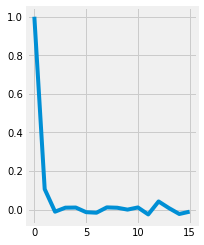

In [29]:
plt.subplot(121) 
plt.plot(lag_acf)


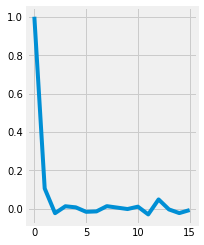

In [30]:
plt.subplot(122)
plt.plot(lag_pacf)


In [31]:
lag_pacf

array([ 1.00000000e+00,  1.06361746e-01, -2.22826072e-02,  1.37621856e-02,
        7.99862333e-03, -1.51581692e-02, -1.29972661e-02,  1.42099618e-02,
        6.74929508e-03, -7.55912525e-04,  1.16159399e-02, -2.87210664e-02,
        4.92226156e-02, -2.68822801e-03, -2.18009617e-02, -6.04833865e-03])

In [32]:
model= ARIMA(np.log(google["High"]),order=(2,1,2))
result=model.fit(disp=-1)

In [33]:
result

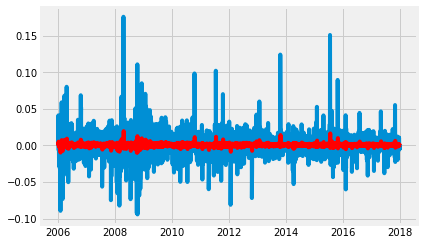

In [34]:
plt.plot(figsize=(6,24))
plt.plot(acf1)
plt.plot(result.fittedvalues, color='red')

In [35]:
data= google.High

In [36]:
from pandas.tools.plotting import autocorrelation_plot

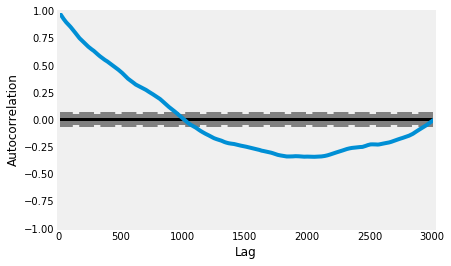

In [37]:
autocorrelation_plot(data)

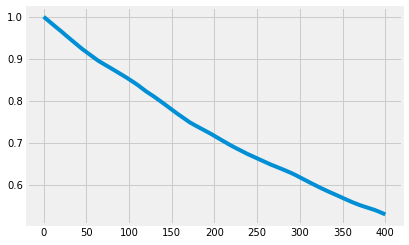

In [38]:
lag_acf = acf(data, nlags=400)
plt.plot(lag_acf)

In [39]:
model = ARIMA(data, order=(20,1,0))

In [40]:
model_fit = model.fit(disp=0)


In [41]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.High   No. Observations:                 3018
Model:                ARIMA(20, 1, 0)   Log Likelihood               -9839.595
Method:                       css-mle   S.D. of innovations              6.305
Date:                Sat, 13 Apr 2019   AIC                          19723.189
Time:                        13:33:11   BIC                          19855.461
Sample:                             1   HQIC                         19770.753
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2784      0.129      2.158      0.031       0.026       0.531
ar.L1.D.High      0.1122      0.018      6.171      0.000       0.077       0.148
ar.L2.D.High     -0.0360      0.018     

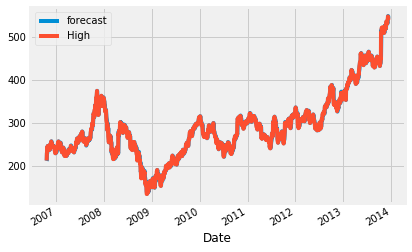

In [42]:
model_fit.plot_predict(start=200, end=2000)
plt.show()

In [43]:
data.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3019, freq=None)

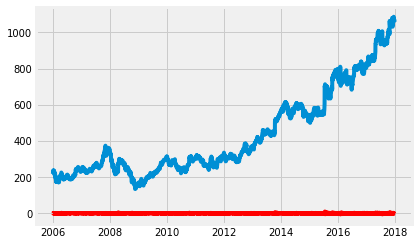

In [44]:
plt.plot(data)
plt.plot(model_fit.fittedvalues, color='red')

In [45]:
pred = pd.Series(model_fit.fittedvalues, copy=True)

In [46]:
predictions_A =pred.cumsum()

In [47]:
predictions_A.head(10)

Date
2006-01-04    0.278437
2006-01-05    1.262485
2006-01-06    1.436009
2006-01-09    2.775038
2006-01-10    2.728188
2006-01-11    2.663901
2006-01-12    3.081732
2006-01-13    2.984999
2006-01-17    2.713275
2006-01-18    3.178566
dtype: float64

In [48]:
predictions_ARIMA_log1 = pd.Series(data.ix[0], index=data.index)
predictions_ARIMA_log = predictions_ARIMA_log1.add(predictions_A,fill_value=0)
predictions_ARIMA_log.head(15)

Date
2006-01-03    218.050000
2006-01-04    218.328437
2006-01-05    219.312485
2006-01-06    219.486009
2006-01-09    220.825038
2006-01-10    220.778188
2006-01-11    220.713901
2006-01-12    221.131732
2006-01-13    221.034999
2006-01-17    220.763275
2006-01-18    221.228566
2006-01-19    220.336963
2006-01-20    220.505820
2006-01-23    219.884158
2006-01-24    219.834077
dtype: float64

In [49]:
data.head(15)

Date
2006-01-03    218.05
2006-01-04    224.70
2006-01-05    226.00
2006-01-06    235.49
2006-01-09    236.94
2006-01-10    235.36
2006-01-11    237.79
2006-01-12    237.73
2006-01-13    233.68
2006-01-17    235.18
2006-01-18    228.91
2006-01-19    226.97
2006-01-20    220.24
2006-01-23    214.41
2006-01-24    222.70
Name: High, dtype: float64

In [50]:
predictions_ARIMA_log1.head(10)

Date
2006-01-03    218.05
2006-01-04    218.05
2006-01-05    218.05
2006-01-06    218.05
2006-01-09    218.05
2006-01-10    218.05
2006-01-11    218.05
2006-01-12    218.05
2006-01-13    218.05
2006-01-17    218.05
dtype: float64